In [39]:
# WHO EDA

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('raw_data/who_data.csv')

In [42]:
df.head()

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,...,iso3,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup,whoreg6,wbincome2023,update,dataset_id
0,Albania,2020-05,UMD-CTIS,anxious_7d,Felt nervous for most or all of the past 7 day...,Age (4 groups) (18-65+),18-24 years,14.0,2.0,10.0,...,ALB,0,100,1,4,0,European,Upper middle income,27 April 2022,rep_ctis1
1,Albania,2020-05,UMD-CTIS,anxious_7d,Felt nervous for most or all of the past 7 day...,Age (4 groups) (18-65+),25-44 years,8.0,1.0,7.0,...,ALB,0,100,1,3,0,European,Upper middle income,27 April 2022,rep_ctis1
2,Albania,2020-05,UMD-CTIS,anxious_7d,Felt nervous for most or all of the past 7 day...,Age (4 groups) (18-65+),45-64 years,5.0,1.0,4.0,...,ALB,0,100,1,2,0,European,Upper middle income,27 April 2022,rep_ctis1
3,Albania,2020-05,UMD-CTIS,anxious_7d,Felt nervous for most or all of the past 7 day...,Age (4 groups) (18-65+),65+ years,6.0,2.0,3.0,...,ALB,0,100,1,1,0,European,Upper middle income,27 April 2022,rep_ctis1
4,Albania,2020-05,UMD-CTIS,anxious_7d,Felt nervous for most or all of the past 7 day...,Gender,Female,7.0,1.0,6.0,...,ALB,0,100,0,0,0,European,Upper middle income,27 April 2022,rep_ctis1


In [43]:
df['indicator_name'].unique()

array(['Felt nervous for most or all of the past 7 days (%)',
       'Felt nervous for most or all of the past 7 days (%) - Female',
       'Felt nervous for most or all of the past 7 days (%) - Male',
       'Felt depressed for most or all of the past 7 days (%)',
       'Felt depressed for most or all of the past 7 days (%) - Female',
       'Felt depressed for most or all of the past 7 days (%) - Male',
       'Very or somewhat worried about their household’s finances for the next month (%)   ',
       'Very or somewhat worried about having enough to eat in the next week (%)',
       "Financial worry due to healthcare costs related to COVID-19, among those very or somewhat worried about their household's finances (%)",
       "Financial worry due to loss of income, among those very or somewhat worried about their household's finances (%)",
       'Worry a great deal or a moderate amount about catching COVID-19 (%)',
       'Worry a great deal or a moderate amount about catching COVI

In [44]:
df.columns

Index(['setting', 'date', 'source', 'indicator_abbr', 'indicator_name',
       'dimension', 'subgroup', 'estimate', 'se', 'ci_lb', 'ci_ub',
       'population', 'flag', 'setting_average', 'iso3', 'favourable_indicator',
       'indicator_scale', 'ordered_dimension', 'subgroup_order',
       'reference_subgroup', 'whoreg6', 'wbincome2023', 'update',
       'dataset_id'],
      dtype='object')

In [45]:
df['date'] = pd.to_datetime(df['date'])

In [46]:
df.date.unique()

array(['2020-05-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-09-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [47]:
df_anxiety = df[df['indicator_name']=='Felt nervous for most or all of the past 7 days (%)']

In [48]:
df.setting.unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Benin', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Czechia', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Ethiopia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Libya',
       'Madagascar', 'Malaysia', 'Mali', 'Mauritania', 'Mexico',
       'Morocco', 'Mozambique', 'Myanmar', 'Nepal',
       'Netherlands (Kingdom of the)', 'N

In [49]:
df_groupby = df_anxiety.groupby('date')

In [55]:
df_groupby.mean()

,estimate,se,ci_lb,ci_ub,population,flag,setting_average,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup
date,,,,,,,,,,,,
2020-05-01,5.167857,0.369048,4.365476,6.307143,2.565183e+08,NaN,5.256881,0.0,100.0,0.500000,1.250000,0.250000
2020-06-01,5.207380,0.718081,3.978598,7.143911,1.650983e+08,NaN,5.217224,0.0,100.0,0.588689,1.625964,0.205656
2020-07-01,5.402965,0.559299,4.357817,6.929245,2.052467e+08,NaN,5.276074,0.0,100.0,0.598773,1.662577,0.200613
2020-08-01,5.448021,0.609658,4.339370,7.123407,2.035254e+08,NaN,5.392638,0.0,100.0,0.598773,1.662577,0.200613
2020-09-01,5.562586,0.704264,4.306052,7.465612,2.003121e+08,NaN,5.478100,0.0,100.0,0.596545,1.656385,0.201727
2020-10-01,5.814325,0.772601,4.476356,7.851878,2.029355e+08,NaN,5.825495,0.0,100.0,0.595297,1.652228,0.202351
2020-11-01,6.230389,0.840283,4.761837,8.425442,1.896795e+08,NaN,6.196262,0.0,100.0,0.592523,1.641745,0.203738
2020-12-01,6.673749,0.735435,5.344071,8.600411,1.739586e+08,NaN,6.563077,0.0,100.0,0.597538,1.658462,0.201231
2021-01-01,6.766349,0.774523,5.383515,8.778610,1.722691e+08,NaN,6.640000,0.0,100.0,0.597538,1.658462,0.201231


<Axes: xlabel='date', ylabel='setting_average'>

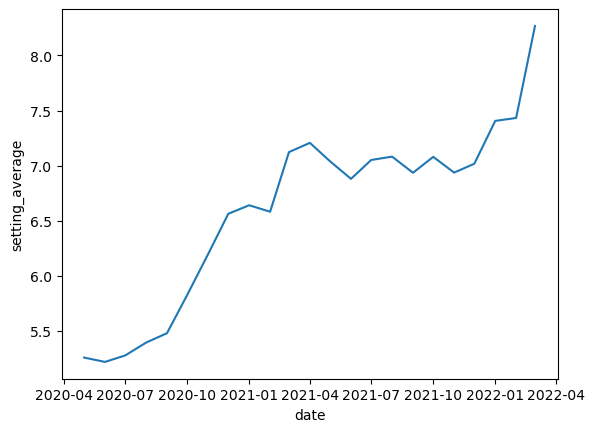

In [54]:
sns.lineplot(data=df_groupby.mean(),
             x='date',
             y='setting_average',
)

In [56]:
df_health_anxiety = df[df['indicator_name']=='Worry a great deal or a moderate amount about catching COVID-19 (%)']

In [58]:
df_health_anxiety['date'].unique()

array(['2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-09-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000'], dtype='datetime64[ns]')

<Axes: xlabel='date', ylabel='setting_average'>

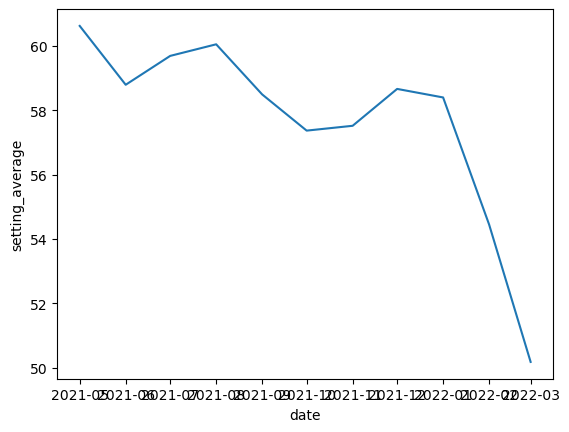

In [57]:
sns.lineplot(data=df_health_anxiety.groupby('date').mean(),
             x='date',
             y='setting_average')